In [1]:
pip install corextopic

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [5]:
import os.path
import json
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import nltk
nltk.download('punkt')
import re
import string
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.decomposition import LatentDirichletAllocation
#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet
from sklearn.decomposition import TruncatedSVD
# for named entity recognition (NER)
from nltk import ne_chunk
nltk.download('wordnet')
from sklearn.model_selection import GridSearchCV
from textblob import TextBlob
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.metrics.pairwise import linear_kernel

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\talba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\talba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
#import json
#import pandas as pd
#data_file = open("yelp_academic_dataset_business.json")
#data = []
#for line in data_file:
    #data.append(json.loads(line))
#checkin_df = pd.DataFrame(data)
#data_file.close()

In [7]:
# importing the module
#import json
 
# Opening JSON file
#with open('yelp_academic_dataset_business.json', encoding="utf8", errors = 'ignore') as json_file:
   # data_new = json.(json_file)
 
    # Print the type of data variable
   # print("Type:", type(data))
 

In [8]:
df= pd.read_csv('yelp_training_set_review.csv')
df

,Unnamed: 0,business_blank,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_neighborhoods,...,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_type,reviewer_useful,stars,text,type,useful,user_id
0,0,False,Breakfast & Brunch; Restaurants,Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,NaN,...,331,Jason,376,user,1034,5,My wife took me here on my birthday for breakf...,review,5,rLtl8ZkDX5vH5nAx9C3q5Q
1,1,False,Italian; Pizza; Restaurants,Phoenix,"4848 E Chandler Blvd\nPhoenix, AZ 85044",ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,NaN,...,2,Paul,2,user,0,5,I have no idea why some people give bad review...,review,0,0a2KyEL0d3Yb1V6aivbIuQ
2,2,False,Middle Eastern; Restaurants,Tempe,"1513 E Apache Blvd\nTempe, AZ 85281",6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,Haji-Baba,NaN,...,0,Nicole,3,user,3,4,love the gyro plate. Rice is so good and I als...,review,1,0hT2KtfLiobPvh6cDC8JQg
3,3,False,Active Life; Dog Parks; Parks,Scottsdale,"5401 N Hayden Rd\nScottsdale, AZ 85250",_1QQZuf4zZOyFCvXc0o6Vg,33.522945,-111.907886,Chaparral Dog Park,NaN,...,18,lindsey,31,user,75,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,2,uZetl9T0NcROGOyFfughhg
4,4,False,Tires; Automotive,Mesa,"1357 S Power Road\nMesa, AZ 85206",6ozycU1RpktNG2-1BroVtw,33.391027,-111.684482,Discount Tire,NaN,...,3,Roger,28,user,32,5,General Manager Scott Petello is a good egg!!!...,review,0,vYmM4KTsC8ZfQBg-j5MWkw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229902,229902,False,Gastropubs; Restaurants,Tempe,"1706 E Warner Rd\nSte 3\nTempe, AZ 85284",vnffHkFJbmd-J3OaBbK2Eg,33.334616,-111.912060,Spitfire Grill & Tavern,NaN,...,18,Lisa,82,user,111,2,I really wanted to like this place because it'...,review,0,6e7pZofhDuIlD_rX2oYirQ
229903,229903,False,Hotels & Travel; Event Planning & Services; Ho...,Peoria,"27501 N Lake Pleasant Rd\nPeoria, AZ 85383",l5oUrgQ190l8CcN8uzd_pA,33.731766,-112.262864,Cibola Vista Resort,NaN,...,29,Jonquil,47,user,50,1,My husband I stayed here for two nights. Of c...,review,2,dDNfSFT0VApxPmURclX6_g
229904,229904,False,Pubs; Bars; American (Traditional); Nightlife;...,Tempe,"530 W Broadway\nTempe, AZ 85281",-EctXOb3B7T177jGYUhjVA,33.407561,-111.947525,Boulders On Broadway,NaN,...,2,Amanda,4,user,2,4,Cool atmosphere. A lot of beers on tap and goo...,review,0,M5wHt6Odh1k5v0tIjqd8DQ
229905,229905,False,Wine Bars; Bars; Pizza; Nightlife; Restaurants,Tempe,"699 S Mill Ave\nTempe, AZ 85281",YQvg0JCGRFUkb6reMMf3Iw,33.423441,-111.939622,La Bocca Urban Pizzeria + Wine Bar,NaN,...,378,Valerie,196,user,678,3,I have to take a star off for the spotty servi...,review,2,jopndPrv-H5KW2CfScnw9A


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229907 entries, 0 to 229906
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              229907 non-null  int64  
 1   business_blank          229907 non-null  bool   
 2   business_categories     229130 non-null  object 
 3   business_city           229907 non-null  object 
 4   business_full_address   229907 non-null  object 
 5   business_id             229907 non-null  object 
 6   business_latitude       229907 non-null  float64
 7   business_longitude      229907 non-null  float64
 8   business_name           229907 non-null  object 
 9   business_neighborhoods  0 non-null       float64
 10  business_open           229907 non-null  bool   
 11  business_review_count   229907 non-null  int64  
 12  business_stars          229907 non-null  float64
 13  business_state          229907 non-null  object 
 14  business_type       

In [10]:
df = df.iloc[219000:,]

In [11]:
df.head()

,Unnamed: 0,business_blank,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_neighborhoods,...,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_type,reviewer_useful,stars,text,type,useful,user_id
219000,219000,False,Food; Specialty Food; Candy Stores,Scottsdale,"15147 N Scottsdale Rd\nSte HI-165\nScottsdale,...",dj-eBnI2RRCqQkLWuYuSQQ,33.494170,-111.926052,It's Sugar,NaN,...,2517,Lindsey,670,user,5065,5,"If the game of Candyland came to life, it woul...",review,4,4ozupHULqGyO42s3zNUzOQ
219001,219001,False,Barbeque; Restaurants,Gilbert,"301 N Gilbert Rd\nGilbert, AZ 85234",5VMajxduxfLPSyQkVFKESg,33.355044,-111.789531,Joe's Real BBQ,NaN,...,11,C,99,user,134,5,This place is awesome! I had the sampler plat...,review,3,aQQn3GztQ_gTb0QOEnxyCg
219002,219002,False,Indian; Buffets; Restaurants,Tempe,"1845 E Broadway Rd\nSte 101\nTempe, AZ 85282",6SMQl2vR37HvjYWwSl1V3w,33.406846,-111.907542,Royal Taj,NaN,...,3,Nathan,13,user,4,3,My girlfriend and I were craving some Indian f...,review,0,ac7U2NcSRZ0k9C-Xq0dZog
219003,219003,False,Pubs; Bars; Nightlife; British; Restaurants,Tempe,"960 W University Dr\nTempe, AZ 85281",WNy1uzcmm_UHmTyR--o5IA,33.422728,-111.951494,Cornish Pasty Company,NaN,...,25,Claudia,33,user,55,4,Those little suckers are filling. They kinda ...,review,3,VeV02NK_4RQm_f-qNxmyPg
219004,219004,False,Health & Medical; Chiropractors,Phoenix,"1650 E. Camelback Rd.\nSuite 170\nPhoenix, AZ ...",az63c_MoXG_-Xs73Ocg0Ew,33.509435,-112.046408,The Joint ...The Chiropractic Place,NaN,...,54,Jenn,140,user,196,5,"I was never one to go to a chiropractor, but i...",review,1,fAiVqZv7P_oc5CzGMX_G9w


In [12]:
df.head()

,Unnamed: 0,business_blank,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_neighborhoods,...,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_type,reviewer_useful,stars,text,type,useful,user_id
219000,219000,False,Food; Specialty Food; Candy Stores,Scottsdale,"15147 N Scottsdale Rd\nSte HI-165\nScottsdale,...",dj-eBnI2RRCqQkLWuYuSQQ,33.494170,-111.926052,It's Sugar,NaN,...,2517,Lindsey,670,user,5065,5,"If the game of Candyland came to life, it woul...",review,4,4ozupHULqGyO42s3zNUzOQ
219001,219001,False,Barbeque; Restaurants,Gilbert,"301 N Gilbert Rd\nGilbert, AZ 85234",5VMajxduxfLPSyQkVFKESg,33.355044,-111.789531,Joe's Real BBQ,NaN,...,11,C,99,user,134,5,This place is awesome! I had the sampler plat...,review,3,aQQn3GztQ_gTb0QOEnxyCg
219002,219002,False,Indian; Buffets; Restaurants,Tempe,"1845 E Broadway Rd\nSte 101\nTempe, AZ 85282",6SMQl2vR37HvjYWwSl1V3w,33.406846,-111.907542,Royal Taj,NaN,...,3,Nathan,13,user,4,3,My girlfriend and I were craving some Indian f...,review,0,ac7U2NcSRZ0k9C-Xq0dZog
219003,219003,False,Pubs; Bars; Nightlife; British; Restaurants,Tempe,"960 W University Dr\nTempe, AZ 85281",WNy1uzcmm_UHmTyR--o5IA,33.422728,-111.951494,Cornish Pasty Company,NaN,...,25,Claudia,33,user,55,4,Those little suckers are filling. They kinda ...,review,3,VeV02NK_4RQm_f-qNxmyPg
219004,219004,False,Health & Medical; Chiropractors,Phoenix,"1650 E. Camelback Rd.\nSuite 170\nPhoenix, AZ ...",az63c_MoXG_-Xs73Ocg0Ew,33.509435,-112.046408,The Joint ...The Chiropractic Place,NaN,...,54,Jenn,140,user,196,5,"I was never one to go to a chiropractor, but i...",review,1,fAiVqZv7P_oc5CzGMX_G9w


In [13]:
df.drop(['Unnamed: 0' , 'business_blank','business_full_address', 'business_id' , 'business_latitude' , 'business_longitude' , 'business_neighborhoods' , 'business_open' , 'business_review_count' ,'review_id' , 'reviewer_average_stars' , 'reviewer_blank' , 'reviewer_cool' , 'reviewer_funny' , 'reviewer_review_count' , 'reviewer_useful' , 'user_id' ] , axis = 1)

,business_categories,business_city,business_name,business_stars,business_state,business_type,cool,date,funny,reviewer_name,reviewer_type,stars,text,type,useful
219000,Food; Specialty Food; Candy Stores,Scottsdale,It's Sugar,4.0,AZ,business,4,2011-08-24,4,Lindsey,user,5,"If the game of Candyland came to life, it woul...",review,4
219001,Barbeque; Restaurants,Gilbert,Joe's Real BBQ,4.0,AZ,business,1,2011-03-20,0,C,user,5,This place is awesome! I had the sampler plat...,review,3
219002,Indian; Buffets; Restaurants,Tempe,Royal Taj,4.0,AZ,business,0,2009-08-22,0,Nathan,user,3,My girlfriend and I were craving some Indian f...,review,0
219003,Pubs; Bars; Nightlife; British; Restaurants,Tempe,Cornish Pasty Company,4.5,AZ,business,2,2008-12-08,2,Claudia,user,4,Those little suckers are filling. They kinda ...,review,3
219004,Health & Medical; Chiropractors,Phoenix,The Joint ...The Chiropractic Place,5.0,AZ,business,0,2012-03-16,0,Jenn,user,5,"I was never one to go to a chiropractor, but i...",review,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229902,Gastropubs; Restaurants,Tempe,Spitfire Grill & Tavern,3.5,AZ,business,0,2011-04-14,0,Lisa,user,2,I really wanted to like this place because it'...,review,0
229903,Hotels & Travel; Event Planning & Services; Ho...,Peoria,Cibola Vista Resort,2.5,AZ,business,0,2011-01-23,0,Jonquil,user,1,My husband I stayed here for two nights. Of c...,review,2
229904,Pubs; Bars; American (Traditional); Nightlife;...,Tempe,Boulders On Broadway,4.0,AZ,business,0,2010-10-11,0,Amanda,user,4,Cool atmosphere. A lot of beers on tap and goo...,review,0
229905,Wine Bars; Bars; Pizza; Nightlife; Restaurants,Tempe,La Bocca Urban Pizzeria + Wine Bar,4.0,AZ,business,0,2011-01-18,1,Valerie,user,3,I have to take a star off for the spotty servi...,review,2


In [14]:
df.shape

(10907, 32)

In [15]:
df.text

219000    If the game of Candyland came to life, it woul...
219001    This place is awesome!  I had the sampler plat...
219002    My girlfriend and I were craving some Indian f...
219003    Those little suckers are filling.  They kinda ...
219004    I was never one to go to a chiropractor, but i...
                                ...                        
229902    I really wanted to like this place because it'...
229903    My husband I stayed here for two nights.  Of c...
229904    Cool atmosphere. A lot of beers on tap and goo...
229905    I have to take a star off for the spotty servi...
229906                                         So cool, yo.
Name: text, Length: 10907, dtype: object

In [16]:
df = df[['business_categories','business_name','text','stars']]

In [17]:
df.head()

,business_categories,business_name,text,stars
219000,Food; Specialty Food; Candy Stores,It's Sugar,"If the game of Candyland came to life, it woul...",5
219001,Barbeque; Restaurants,Joe's Real BBQ,This place is awesome! I had the sampler plat...,5
219002,Indian; Buffets; Restaurants,Royal Taj,My girlfriend and I were craving some Indian f...,3
219003,Pubs; Bars; Nightlife; British; Restaurants,Cornish Pasty Company,Those little suckers are filling. They kinda ...,4
219004,Health & Medical; Chiropractors,The Joint ...The Chiropractic Place,"I was never one to go to a chiropractor, but i...",5


In [18]:
df.shape

(10907, 4)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10907 entries, 219000 to 229906
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   business_categories  10872 non-null  object
 1   business_name        10907 non-null  object
 2   text                 10906 non-null  object
 3   stars                10907 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 341.0+ KB


In [20]:
df.describe()


,stars
count,10907.000000
mean,3.755478
std,1.215421
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [21]:
df.isna().sum()

business_categories    35
business_name           0
text                    1
stars                   0
dtype: int64

In [22]:
df.dropna(inplace = True)

In [23]:
df.isna().sum()

business_categories    0
business_name          0
text                   0
stars                  0
dtype: int64

In [24]:
df = df.rename(columns={'business_categories':'Categories', 'business_city':'City' , 'business_name':'Name' , 'text': 'Text' , 'stars':'Stars'})
df.head()

,Categories,Name,Text,Stars
219000,Food; Specialty Food; Candy Stores,It's Sugar,"If the game of Candyland came to life, it woul...",5
219001,Barbeque; Restaurants,Joe's Real BBQ,This place is awesome! I had the sampler plat...,5
219002,Indian; Buffets; Restaurants,Royal Taj,My girlfriend and I were craving some Indian f...,3
219003,Pubs; Bars; Nightlife; British; Restaurants,Cornish Pasty Company,Those little suckers are filling. They kinda ...,4
219004,Health & Medical; Chiropractors,The Joint ...The Chiropractic Place,"I was never one to go to a chiropractor, but i...",5


In [25]:
yelp_text = df[['Stars', 'Text']]
yelp_text.head()

,Stars,Text
219000,5,"If the game of Candyland came to life, it woul..."
219001,5,This place is awesome! I had the sampler plat...
219002,3,My girlfriend and I were craving some Indian f...
219003,4,Those little suckers are filling. They kinda ...
219004,5,"I was never one to go to a chiropractor, but i..."


In [26]:
# take only the apps that have a rating above 4 then sort by ratings
df_new = yelp_text[yelp_text.Stars > 4].sort_values(by=['Stars'], ascending=False)
df_new.head()

,Stars,Text
219000,5,"If the game of Candyland came to life, it woul..."
226246,5,I dont care about the wait. It's part of the e...
226218,5,I got the pleasure of having a work luncheon a...
226221,5,First I would like to say to everyone that com...
226222,5,I am a very picky restaurant patron and this p...


In [27]:
print(df['Categories'].value_counts())

Mexican; Restaurants                                                                694
American (New); Restaurants                                                         335
Pizza; Restaurants                                                                  298
Food; Coffee & Tea                                                                  246
American (Traditional); Restaurants                                                 238
                                                                                   ... 
Seafood; Mexican; Tex-Mex; Restaurants                                                1
Solar Installation; Windows Installation; Home Services                               1
Food; Specialty Food; Grocery; Beer, Wine & Spirits                                   1
Pediatric Dentists; Health & Medical; Dentists; Orthodontists; Cosmetic Dentists      1
Delis; Restaurants; Italian                                                           1
Name: Categories, Length: 1221, 

In [28]:
df_new.shape


(3534, 2)

In [29]:
topics = list(df['Categories'].unique())


In [30]:
def remove_punc_stopword(text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    remove_punc = [word for word in text if word not in string.punctuation]
    remove_punc = ''.join(remove_punc)
    return [word.lower() for word in remove_punc.split() if word.lower() not in stopwords.words('english')]

In [31]:
yelp_text_allstars = yelp_text.copy()
yelp_text_allstars['Text'] = yelp_text_allstars['Text'].apply(remove_punc_stopword)
#yelp_text_allstars.count()

In [32]:
yelp_text_allstars.head()

,Stars,Text
219000,5,"[game, candyland, came, life, would, look, exa..."
219001,5,"[place, awesome, sampler, platter, wowi, could..."
219002,3,"[girlfriend, craving, indian, food, looked, pl..."
219003,4,"[little, suckers, filling, kinda, sit, like, l..."
219004,5,"[never, one, go, chiropractor, desperate, atte..."


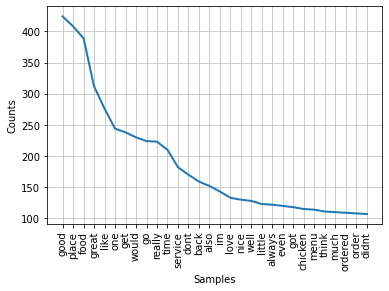

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [33]:
words_split = []
for i in range(219000,219631): 
    for word in yelp_text_allstars['Text'][i]:
        words_split.append(word)
FreqDist(words_split).plot(30, cumulative=False)

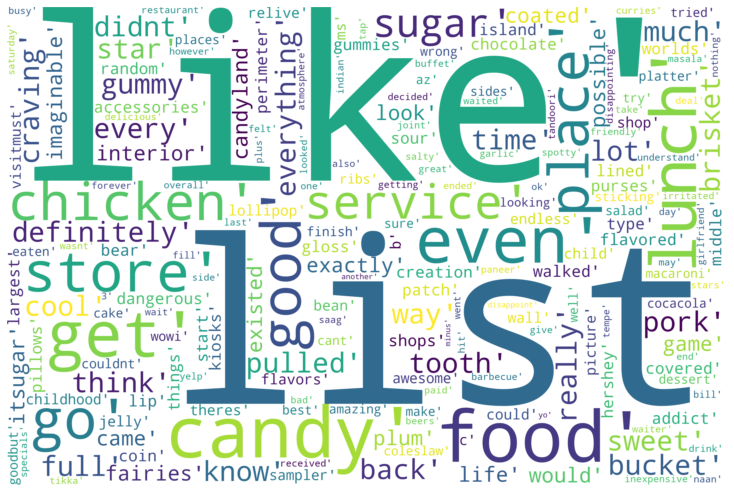

In [34]:
yelp_allstars_text = yelp_text_allstars['Text'].values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(yelp_allstars_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'w',
    edgecolor = 'w')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

In [35]:
warnings.filterwarnings("ignore")
yelp_text_stars1 = yelp_text[yelp_text['Stars']==1]
yelp_text_stars1['Text'] = yelp_text_stars1['Text'].apply(remove_punc_stopword)
yelp_text_stars1.count()

Stars    817
Text     817
dtype: int64

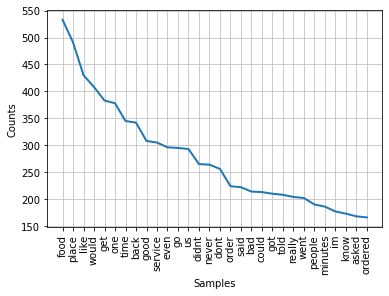

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [36]:
yelp_text_stars1 = yelp_text_stars1.reset_index(drop=True)
words_split = []
for i in range(0,749): 
    for word in yelp_text_stars1['Text'][i]:
        words_split.append(word)
FreqDist(words_split).plot(30, cumulative=False)

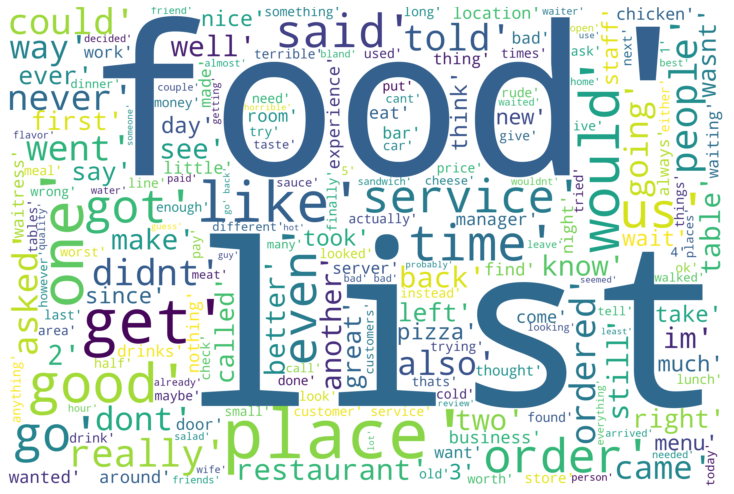

In [37]:
yelp_stars1_text = yelp_text_stars1['Text'].values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(yelp_stars1_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'w',
    edgecolor = 'w')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

In [38]:
warnings.filterwarnings("ignore")
yelp_text_stars5 = yelp_text[yelp_text['Stars']==5]
yelp_text_stars5['Text'] = yelp_text_stars5['Text'].apply(remove_punc_stopword)
yelp_text_stars5.count()

Stars    3534
Text     3534
dtype: int64

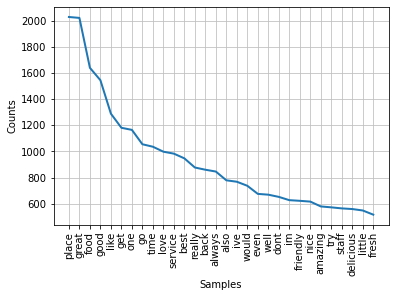

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [39]:
yelp_text_stars5 = yelp_text_stars5.reset_index(drop=True)
words_split = []
for i in range(0,3337): 
    for word in yelp_text_stars5['Text'][i]:
        words_split.append(word)
FreqDist(words_split).plot(30, cumulative=False)

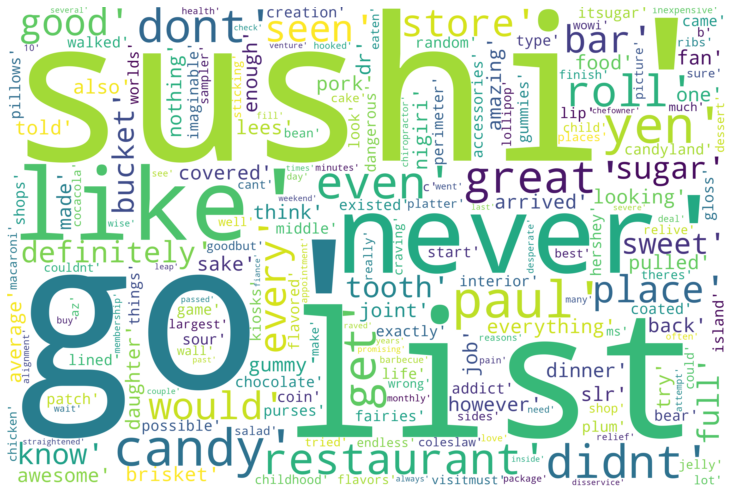

In [40]:
yelp_stars5_text = yelp_text_stars5['Text'].values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(yelp_stars5_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'w',
    edgecolor = 'w')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

In [41]:
stopwords=set(stopwords.words('english'))
stopwords2= stopwords.union({'good','great','one','get','would','could','always', 'like','also','food'})

In [42]:
df['SwText'] = df['Text'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word.lower() not in (stopwords2)]))
df.head()

,Categories,Name,Text,Stars,SwText
219000,Food; Specialty Food; Candy Stores,It's Sugar,"If the game of Candyland came to life, it woul...",5,"game candyland came life, look exactly interio..."
219001,Barbeque; Restaurants,Joe's Real BBQ,This place is awesome! I had the sampler plat...,5,"place awesome! sampler platter, wow...i even f..."
219002,Indian; Buffets; Restaurants,Royal Taj,My girlfriend and I were craving some Indian f...,3,girlfriend craving indian looked place yelp de...
219003,Pubs; Bars; Nightlife; British; Restaurants,Cornish Pasty Company,Those little suckers are filling. They kinda ...,4,little suckers filling. kinda sit loving brick...
219004,Health & Medical; Chiropractors,The Joint ...The Chiropractic Place,"I was never one to go to a chiropractor, but i...",5,"never go chiropractor, desperate attempt pain ..."


In [43]:
le=WordNetLemmatizer()
df['LemmaText']=df['SwText'].apply(lambda x:le.lemmatize(x))

In [44]:
df['PunText'] = df['LemmaText'].apply(lambda x: x.translate(str.maketrans('','', string.punctuation))) 
df.head()

,Categories,Name,Text,Stars,SwText,LemmaText,PunText
219000,Food; Specialty Food; Candy Stores,It's Sugar,"If the game of Candyland came to life, it woul...",5,"game candyland came life, look exactly interio...","game candyland came life, look exactly interio...",game candyland came life look exactly interior...
219001,Barbeque; Restaurants,Joe's Real BBQ,This place is awesome! I had the sampler plat...,5,"place awesome! sampler platter, wow...i even f...","place awesome! sampler platter, wow...i even f...",place awesome sampler platter wowi even finish...
219002,Indian; Buffets; Restaurants,Royal Taj,My girlfriend and I were craving some Indian f...,3,girlfriend craving indian looked place yelp de...,girlfriend craving indian looked place yelp de...,girlfriend craving indian looked place yelp de...
219003,Pubs; Bars; Nightlife; British; Restaurants,Cornish Pasty Company,Those little suckers are filling. They kinda ...,4,little suckers filling. kinda sit loving brick...,little suckers filling. kinda sit loving brick...,little suckers filling kinda sit loving brick ...
219004,Health & Medical; Chiropractors,The Joint ...The Chiropractic Place,"I was never one to go to a chiropractor, but i...",5,"never go chiropractor, desperate attempt pain ...","never go chiropractor, desperate attempt pain ...",never go chiropractor desperate attempt pain r...


In [45]:
df['TokenText'] = df['PunText'].apply(lambda x: word_tokenize(x))
df.head()

,Categories,Name,Text,Stars,SwText,LemmaText,PunText,TokenText
219000,Food; Specialty Food; Candy Stores,It's Sugar,"If the game of Candyland came to life, it woul...",5,"game candyland came life, look exactly interio...","game candyland came life, look exactly interio...",game candyland came life look exactly interior...,"[game, candyland, came, life, look, exactly, i..."
219001,Barbeque; Restaurants,Joe's Real BBQ,This place is awesome! I had the sampler plat...,5,"place awesome! sampler platter, wow...i even f...","place awesome! sampler platter, wow...i even f...",place awesome sampler platter wowi even finish...,"[place, awesome, sampler, platter, wowi, even,..."
219002,Indian; Buffets; Restaurants,Royal Taj,My girlfriend and I were craving some Indian f...,3,girlfriend craving indian looked place yelp de...,girlfriend craving indian looked place yelp de...,girlfriend craving indian looked place yelp de...,"[girlfriend, craving, indian, looked, place, y..."
219003,Pubs; Bars; Nightlife; British; Restaurants,Cornish Pasty Company,Those little suckers are filling. They kinda ...,4,little suckers filling. kinda sit loving brick...,little suckers filling. kinda sit loving brick...,little suckers filling kinda sit loving brick ...,"[little, suckers, filling, kinda, sit, loving,..."
219004,Health & Medical; Chiropractors,The Joint ...The Chiropractic Place,"I was never one to go to a chiropractor, but i...",5,"never go chiropractor, desperate attempt pain ...","never go chiropractor, desperate attempt pain ...",never go chiropractor desperate attempt pain r...,"[never, go, chiropractor, desperate, attempt, ..."


In [46]:
df['CleanText']= df['TokenText'].apply(lambda x: ' '.join(x))

In [47]:
df['NumCleanText']= df['CleanText'].apply(lambda x: x.translate(str.maketrans('','', string.digits))) 
df.head()

,Categories,Name,Text,Stars,SwText,LemmaText,PunText,TokenText,CleanText,NumCleanText
219000,Food; Specialty Food; Candy Stores,It's Sugar,"If the game of Candyland came to life, it woul...",5,"game candyland came life, look exactly interio...","game candyland came life, look exactly interio...",game candyland came life look exactly interior...,"[game, candyland, came, life, look, exactly, i...",game candyland came life look exactly interior...,game candyland came life look exactly interior...
219001,Barbeque; Restaurants,Joe's Real BBQ,This place is awesome! I had the sampler plat...,5,"place awesome! sampler platter, wow...i even f...","place awesome! sampler platter, wow...i even f...",place awesome sampler platter wowi even finish...,"[place, awesome, sampler, platter, wowi, even,...",place awesome sampler platter wowi even finish...,place awesome sampler platter wowi even finish...
219002,Indian; Buffets; Restaurants,Royal Taj,My girlfriend and I were craving some Indian f...,3,girlfriend craving indian looked place yelp de...,girlfriend craving indian looked place yelp de...,girlfriend craving indian looked place yelp de...,"[girlfriend, craving, indian, looked, place, y...",girlfriend craving indian looked place yelp de...,girlfriend craving indian looked place yelp de...
219003,Pubs; Bars; Nightlife; British; Restaurants,Cornish Pasty Company,Those little suckers are filling. They kinda ...,4,little suckers filling. kinda sit loving brick...,little suckers filling. kinda sit loving brick...,little suckers filling kinda sit loving brick ...,"[little, suckers, filling, kinda, sit, loving,...",little suckers filling kinda sit loving brick ...,little suckers filling kinda sit loving brick ...
219004,Health & Medical; Chiropractors,The Joint ...The Chiropractic Place,"I was never one to go to a chiropractor, but i...",5,"never go chiropractor, desperate attempt pain ...","never go chiropractor, desperate attempt pain ...",never go chiropractor desperate attempt pain r...,"[never, go, chiropractor, desperate, attempt, ...",never go chiropractor desperate attempt pain r...,never go chiropractor desperate attempt pain r...


In [48]:
df.drop(['Text', 'SwText','LemmaText','PunText','TokenText','CleanText'], axis = 1, inplace = True)

In [49]:
df.Name.nunique()

3458

In [50]:
cv= CountVectorizer()
X = cv.fit_transform(df['NumCleanText'])
names=pd.DataFrame(X.toarray(),columns=cv.get_feature_names())

In [51]:
names.shape

(10871, 36546)

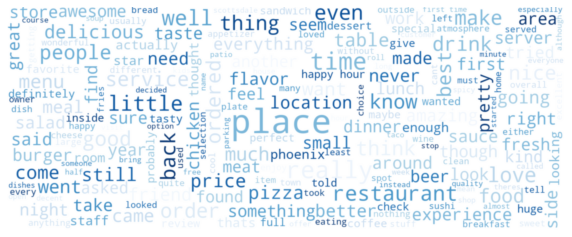

In [52]:
word_cloud = WordCloud(width = 2000,
                       height = 800,
                       colormap = 'Blues', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(df['NumCleanText']))

plt.figure(figsize = (10, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

In [53]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

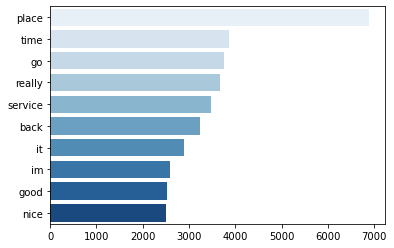

In [82]:
top_trigrams = get_top_ngram(df['NumCleanText'],1)[:10]
x,y = map(list,zip(*top_trigrams))
sns.barplot(x = y , y = x , palette = "Blues")

In [55]:
#fit the text to Tfidf vectorizer to weight every word depend on how much it appears in the text -most frequent word less weight-
vect =TfidfVectorizer(stop_words=stopwords)
vect_text=vect.fit_transform(df['NumCleanText'])
print(vect_text.shape)
print(vect_text)

(10871, 36418)
  (0, 7311)	0.07168843018330094
  (0, 5533)	0.11243133309082073
  (0, 26182)	0.12532272796731278
  (0, 5530)	0.09096107946086655
  (0, 34656)	0.13507469172869307
  (0, 28689)	0.06008211018632272
  (0, 23678)	0.08722287245926107
  (0, 13388)	0.03275852054356052
  (0, 20600)	0.10874010145758913
  (0, 2558)	0.07634477905833653
  (0, 16794)	0.10340102031800123
  (0, 11888)	0.06389307964660391
  (0, 10354)	0.09745180087211514
  (0, 34885)	0.07064024594953743
  (0, 2054)	0.03428978528573037
  (0, 32269)	0.0602880032719352
  (0, 18418)	0.12218329685220101
  (0, 17698)	0.09794550450207444
  (0, 35837)	0.1058188004445522
  (0, 32318)	0.05157601389153627
  (0, 17328)	0.11391366174971455
  (0, 13349)	0.11961819485851366
  (0, 18222)	0.11391366174971455
  (0, 11872)	0.08794452344782185
  (0, 25242)	0.11109040371014928
  :	:
  (10869, 16525)	0.28007903756677727
  (10869, 25836)	0.1893738376727846
  (10869, 8910)	0.22951616650632456
  (10869, 11467)	0.16325842288915218
  (10869, 10340

In [56]:
idf=vect.idf_


In [57]:
# shows most frequent word and least frequent word
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)
# print(l)
print(l[0],l[-1])

place zzas


In [58]:
from sklearn.decomposition import PCA,TruncatedSVD,NMF

In [59]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [60]:
nmf_model = NMF(10, random_state=7)
doc_topic = nmf_model.fit_transform(X)
doc_topic_tfid = nmf_model.fit_transform(vect_text)

In [61]:
display_topics(nmf_model, vect.get_feature_names(), 20)


Topic  0
time, us, back, go, even, im, got, went, really, people, going, first, know, minutes, never, said, came, ive, see, store

Topic  1
pizza, crust, cheese, thin, best, pizzas, wait, sauce, salad, wings, slice, slices, sausage, toppings, pretty, pepperoni, italian, good, bianco, oreganos

Topic  2
chicken, salad, sauce, lunch, good, thai, ordered, sandwich, rice, cheese, delicious, fresh, menu, bread, beef, fried, meat, restaurant, spicy, soup

Topic  3
place, really, go, nice, fun, little, good, best, awesome, people, pretty, cool, mexican, area, places, recommend, want, definitely, prices, great

Topic  4
happy, hour, bar, drinks, beer, wine, atmosphere, night, patio, beers, specials, selection, drink, appetizers, pretty, menu, nice, awesome, music, pm

Topic  5
burger, fries, burgers, potato, sweet, beer, cheese, onion, bun, good, order, best, rings, bacon, dog, joint, fast, delux, well, side

Topic  6
sushi, rolls, roll, fish, fresh, japanese, best, sashimi, ra, better, tuna,

In [62]:
#defined the model
lsa = TruncatedSVD(n_components=10, random_state=42)
#fit the model
doc_topic=lsa.fit_transform(vect_text)
#print(lsa_top)
#print(lsa_top.shape)
lsa.explained_variance_ratio_


array([0.00297436, 0.00384219, 0.00351403, 0.00327879, 0.00289509,
       0.00266037, 0.00255515, 0.00240392, 0.00234744, 0.00229423])

In [63]:
# Show top n keywords for each topic
def show_topics(vectorizer, model, n_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

In [64]:
topic_keywords = show_topics(vectorizer=cv, model=lsa, n_words=10)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9
Topic 0,piqued,senorita,raven,gloved,throng,babysit,gokarts,lorraine,networkbut,chewiness
Topic 1,ping,crumb,checkups,sabai,sangria,themebar,lorraine,pinots,berm,chewiness
Topic 2,ping,piqued,lorraine,sprung,banquet,sticker,cocktel,freshmade,peddling,rockin
Topic 3,lorraine,piqued,superstore,foldable,atl,freshmade,tereyaki,berm,senorita,delays
Topic 4,superstore,senorita,hostesswaitressowner,hang,banquet,robbie,driedup,roaster,unworn,ewww
Topic 5,bunkers,fridays,buonos,beefeater,atl,checkups,banquet,piqued,raven,driedup
Topic 6,senorita,foldable,freshmade,ewww,sprung,atl,breadpastry,networkbut,cocktel,lowrider
Topic 7,lorraine,hang,hostesswaitressowner,unworn,whoppers,sabai,delays,brassy,goooood,saltiness
Topic 8,bunkers,senorita,lorraine,fridays,berm,itchin,europa,throng,buonos,superstore
Topic 9,cocktel,superstore,breadpastry,saltiness,freshmade,sabai,lowrider,freestanding,sprung,delays


In [65]:
# weight .of each topic in the document 
l=doc_topic[0]
print("Document 0 :")
for i,topic in enumerate(l):
    print("Topic ",i," : ",topic*100)

Document 0 :
Topic  0  :  9.172812492245306
Topic  1  :  -3.0438787859779604
Topic  2  :  1.955997827901497
Topic  3  :  -4.005444375907743
Topic  4  :  -5.079261371433834
Topic  5  :  -2.8398273047501257
Topic  6  :  -2.2769818353686273
Topic  7  :  0.8684859080975162
Topic  8  :  0.044734191486092464
Topic  9  :  2.028894907079356


In [66]:
#words that has most weight to each topic
print(lsa.components_.shape) 
print(lsa.components_)

(10, 36418)
[[ 1.02167320e-04  6.31389762e-04  1.50216198e-04 ...  1.91895357e-04
   9.42871192e-05  1.14577743e-04]
 [-1.80167315e-04 -8.67587445e-04 -1.50548421e-04 ... -5.41217908e-05
  -1.57644545e-05  9.17050100e-04]
 [ 2.28813606e-04  1.23821770e-03 -6.60681303e-06 ...  2.41873685e-04
  -1.14346470e-04  1.75774728e-04]
 ...
 [ 2.13154410e-07  4.60042083e-04 -8.19292670e-05 ... -7.51042413e-04
  -1.92035945e-04 -3.00226770e-04]
 [-5.28905085e-04  1.25378262e-03 -3.70355569e-04 ... -5.58917644e-04
  -3.32497770e-04  2.25025313e-05]
 [-2.27212824e-04  5.39634453e-04  6.81665079e-04 ...  2.70227344e-04
   8.97496340e-06  2.00389126e-04]]


In [67]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")
         

Topic 0: 
place service really go time back good love nice chicken 

Topic 1: 
pizza crust cheese salad sauce thin love pizzas best chicken 

Topic 2: 
pizza place love staff bar store coffee friendly people room 

Topic 3: 
love place sushi food atmosphere friendly thai best service delicious 

Topic 4: 
sushi service hour happy bar rolls drinks roll us excellent 

Topic 5: 
burger fries burgers beer atmosphere cheese bar place really drinks 

Topic 6: 
service food friendly excellent staff atmosphere breakfast nice coffee lunch 

Topic 7: 
love happy hour us wine salad delicious bread got sandwich 

Topic 8: 
burger service love fries best ive ever time burgers sushi 

Topic 9: 
coffee sushi breakfast sandwich friendly salad lunch fresh staff delicious 



In [68]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] =df['NumCleanText'].apply(getSubjectivity)
df['Polarity'] = df['NumCleanText'].apply(getPolarity)

In [69]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

#Show the data
df

,Categories,Name,Stars,NumCleanText,Subjectivity,Polarity,Analysis
219000,Food; Specialty Food; Candy Stores,It's Sugar,5,game candyland came life look exactly interior...,0.485714,-0.008929,Negative
219001,Barbeque; Restaurants,Joe's Real BBQ,5,place awesome sampler platter wowi even finish...,0.585354,0.281818,Positive
219002,Indian; Buffets; Restaurants,Royal Taj,3,girlfriend craving indian looked place yelp de...,0.658333,-0.078125,Negative
219003,Pubs; Bars; Nightlife; British; Restaurants,Cornish Pasty Company,4,little suckers filling kinda sit loving brick ...,0.598333,0.216250,Positive
219004,Health & Medical; Chiropractors,The Joint ...The Chiropractic Place,5,never go chiropractor desperate attempt pain r...,0.800000,0.420000,Positive
...,...,...,...,...,...,...,...
229902,Gastropubs; Restaurants,Spitfire Grill & Tavern,2,really wanted place close home honestly bad pr...,0.530388,0.184774,Positive
229903,Hotels & Travel; Event Planning & Services; Ho...,Cibola Vista Resort,1,husband stayed two nights course room ready pm...,0.556250,-0.150000,Negative
229904,Pubs; Bars; American (Traditional); Nightlife;...,Boulders On Broadway,4,cool atmosphere lot beers tap food went saturd...,0.650000,0.350000,Positive
229905,Wine Bars; Bars; Pizza; Nightlife; Restaurants,La Bocca Urban Pizzeria + Wine Bar,3,take star spotty service received last time lu...,0.173333,0.080000,Positive


In [70]:
pText = df[df.Analysis == 'Positive']
pText = pText['NumCleanText']

round((pText.shape[0] / df.shape[0]) * 100, 1)

86.5

In [71]:
pText = df[df.Analysis == 'Negative']
pText = pText['NumCleanText']

round((pText.shape[0] / df.shape[0]) * 100, 1)

11.7

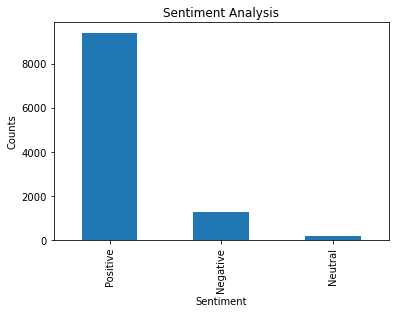

In [78]:
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [73]:
cosine_sim = linear_kernel(vect_text, vect_text)

In [74]:
def recommend(text, df, limit=5):
    #get cos similarity between input (text) and reviews
    df['cos_similarity']=linear_kernel(vect_text,vect.transform([text]))
    
    #get top n similar reviews with unique coffe shop names
    sorted_df= df.sort_values('cos_similarity', ascending=False)
    recomended_list=[]
    for n in sorted_df['Name']:
        if n not in recomended_list:
            recomended_list.append(n)
        if len(recomended_list)==limit:
            break
    #return the list of coffe shops
    return recomended_list 

In [75]:
recommend('Good place', df)


['FnB',
 'Copper Door Bar',
 'Da Vàng',
 "Logan's Roadhouse",
 'Shangri-La Chinese']

In [76]:
recommend('Good Service', df)


['FnB',
 "Jersey Mike's Subs",
 'SaBai Modern Thai',
 'Da Vàng',
 'Citizen Public House']

In [77]:
recommend('Good Food', df)


['FnB',
 "Dick's Hideaway",
 'California Pizza Kitchen',
 'CherryBlossom Noodle Cafe',
 'Texas BBQ House']